In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# %load_ext wurlitzer

In [8]:
df = pd.read_csv('st_ts.txt', index_col='id', header=0, parse_dates=True, )
df.shape

(58424, 106)

In [9]:
df.head()

,2017-08-28,2017-09-04,2017-09-11,2017-09-18,2017-09-25,2017-10-02,2017-10-09,2017-10-16,2017-10-23,2017-10-30,...,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02
id,,,,,,,,,,,,,,,,,,,,,
0,2,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,3,2,0,1,0,0,2,0,0,0,...,0,0,0,0,1,0,1,0,1,2
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,5,3,2,1,0,0,3,3,1,...,0,1,0,0,0,0,0,1,1,2
4,1,1,1,15,0,1,4,0,0,0,...,0,0,0,0,0,0,2,0,0,1


In [10]:
df['mean'] = df[df.columns].mean()

In [11]:
df.head()

,2017-08-28,2017-09-04,2017-09-11,2017-09-18,2017-09-25,2017-10-02,2017-10-09,2017-10-16,2017-10-23,2017-10-30,...,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,mean
id,,,,,,,,,,,,,,,,,,,,,
0,2,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,NaN
1,3,2,0,1,0,0,2,0,0,0,...,0,0,0,1,0,1,0,1,2,NaN
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,5,3,2,1,0,0,3,3,1,...,1,0,0,0,0,0,1,1,2,NaN
4,1,1,1,15,0,1,4,0,0,0,...,0,0,0,0,0,2,0,0,1,NaN


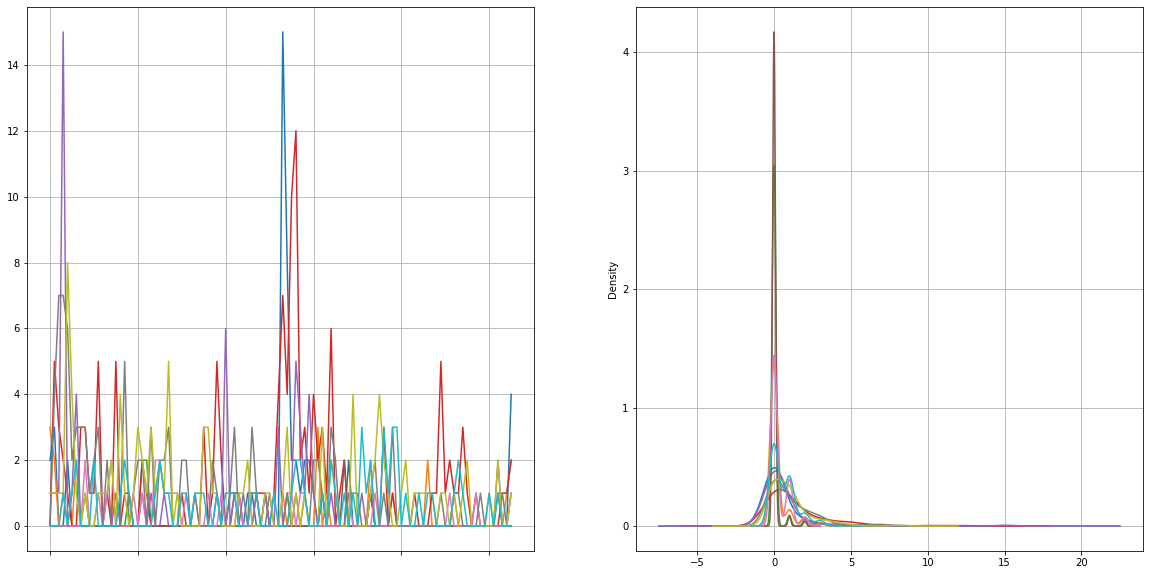

In [14]:
plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
for i in range(10):
    df.iloc[i].plot()
plt.grid(b=True)
plt.subplot(1, 2, 2)
for i in range(10):
    df.iloc[i].plot(kind='kde')
plt.grid(b=True)
plt.show()

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

PCA

In [25]:
pca_data = PCA(n_components=2, random_state=0).fit_transform(df[:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
plt.figure(figsize=[20, 5])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='b')
plt.show()

NameError: name 'pca_data' is not defined

<Figure size 1440x360 with 0 Axes>

In [9]:
kmeans = KMeans(n_clusters=8, random_state=0).fit_predict(pca_data)

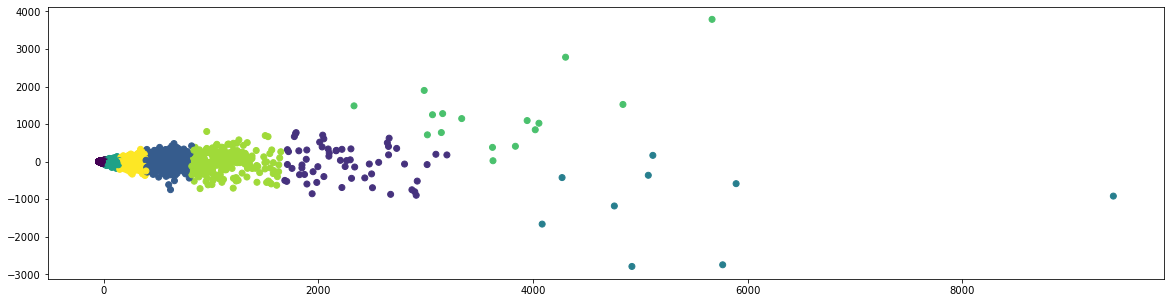

In [10]:
plt.figure(figsize=[20, 5])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans)
plt.show()

TSNE

In [16]:
df_data = pd.read_csv('st_ts.txt', index_col='id', header=0, parse_dates=True, )

In [17]:
%time tsne_data = TSNE(n_components=2, random_state=0, n_iter=250, ).fit_transform(df_data[:])

Wall time: 16min 47s


In [18]:
with open('1', 'w') as txt:
    for elem in tsne_data:
        print(elem, file=txt)

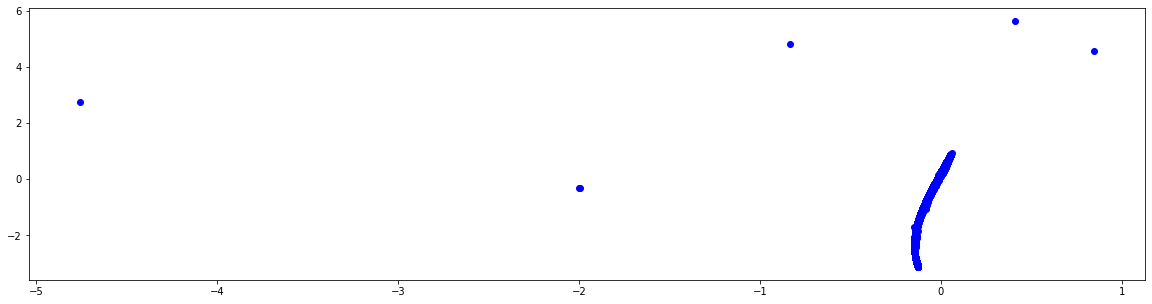

In [19]:
plt.figure(figsize=[20, 5])
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='b')
plt.show()

37.66426332060347